In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Step 1: Data Preparation


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/mkjubran/ENCS5141Datasets/main/BankNotesDataset.csv"
data = pd.read_csv(url)
# Display the first few rows of the dataframe
print(data.head())
print("---------------------------------------------------------------------------")

# Correctly split the 'Denomination' column into 'Denomination' and 'Orientation'
split_columns = data['Denomination'].str.split('_', expand=True)
data['Denomination'] = split_columns[0]
data['Orientation'] = split_columns[1]

# Get a concise summary of the dataframe, including the number of non-null values in each column
print("Summary of the dataframe (info):")
print(data.info())
print("---------------------------------------------------------------------------")

# Generate descriptive statistics to summarize the central tendency, dispersion, and shape of the dataset's distribution
print("Descriptive statistics of the dataset:")
print(data.describe())
print("---------------------------------------------------------------------------")

# Check for missing values in each column
print("Missing values in each column:")
print(data.isnull().sum())
print("---------------------------------------------------------------------------")

# Split the data into features and labels
X = data.drop(['Currency', 'Denomination', 'Orientation'], axis=1)
y = data[['Currency', 'Denomination', 'Orientation']]  # For option 1
y_combined = data['Currency'].astype(str) + "_" + data['Denomination'].astype(str) + "_" + data['Orientation'].astype(str)  # For option 2

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.2, random_state=42)




   Unnamed: 0       v_0       v_1       v_2       v_3       v_4       v_5  \
0           0  0.000000  0.802783  4.799193  3.520272  3.906448  2.964886   
1           1  1.282011  0.169436  4.367540  4.476254  5.645983  2.173897   
2           2  1.956406  0.000000  5.244660  3.611655  5.085964  3.766434   
3           3  0.382722  3.727718  4.409414  3.093557  6.277169  0.000000   
4           4  0.619588  0.071276  3.780865  3.637381  4.144943  3.829269   

        v_6       v_7       v_8  ...     v_248     v_249     v_250     v_251  \
0  2.276473  0.472117  0.000000  ...  0.319955  5.005167  5.144637  0.000000   
1  0.638572  0.000000  0.149849  ...  0.671412  4.548221  2.671707  0.000000   
2  0.000000  1.865016  2.853455  ...  0.434040  6.429610  2.465012  0.000000   
3  1.368437  0.000000  1.095514  ...  2.279172  4.439319  0.273129  0.438889   
4  0.811821  0.387360  1.005720  ...  0.000000  6.559031  4.807416  0.017139   

      v_252  v_253     v_254     v_255  Currency  Denomi

The dataset from "BankNotesDataset.csv" consists of 24,826 entries, each characterized by 259 attributes, mainly numerical, and includes specific features for currency and denomination, suitable for classification tasks. It's structured well, with no missing values, making it ready for machine learning applications. You can utilize this data to predict banknote attributes like currency, denomination, and orientation by employing machine learning models such as SVM and MLP. The dataset’s broad range of features provides a good basis for advanced analysis techniques, including dimensionality reduction to simplify the data while retaining crucial information, and hyperparameter tuning to optimize model performance. This comprehensive setup is ideal for exploring different modeling strategies to see which yields the best results for predicting the characteristics of banknotes.

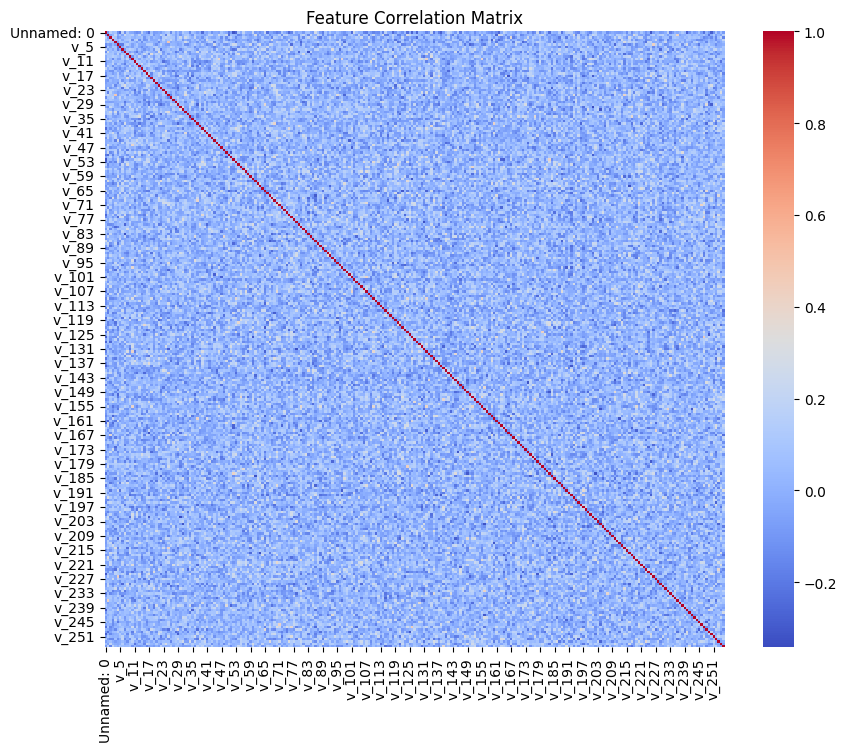

In [ ]:
# Visualization of feature distributions and correlations
import seaborn as sns
import matplotlib.pyplot as plt

# Feature correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.iloc[:, :-3].corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

The heatmap suggests that your dataset's features have very low correlation with each other, indicating that each feature contributes unique information. For such a dataset, dimensionality reduction techniques like PCA could be quite effective in reducing the number of features while still capturing the majority of the data's variability. This could simplify your model, potentially improve performance, and reduce overfitting risks.

# Step 2: Dimensionality Reduction


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit the scaler on the training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_combined = scaler.fit_transform(X_train_combined)
X_test_combined = scaler.transform(X_test_combined)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_reduced_pca = pca.fit_transform(X_train)
X_test_reduced_pca = pca.transform(X_test)
X_train_combined_reduced_pca = pca.fit_transform(X_train_combined)
X_test_combined_reduced_pca = pca.transform(X_test_combined)


# Output the results of PCA dimension reduction for both datasets
print("Original number of features:", X.shape[1])
print("Reduced number of features after PCA (individual training set):", X_train_reduced_pca.shape[1])
print("Reduced number of features after PCA (individual testing set):", X_test_reduced_pca.shape[1])
print("Reduced number of features after PCA (combined training set):", X_train_combined_reduced_pca.shape[1])
print("Reduced number of features after PCA (combined testing set):", X_test_combined_reduced_pca.shape[1])



Original number of features: 257
Reduced number of features after PCA (individual training set): 124
Reduced number of features after PCA (individual testing set): 124
Reduced number of features after PCA (combined training set): 124
Reduced number of features after PCA (combined testing set): 124


I recommended using Principal Component Analysis (PCA) because the dataset has a large number of features (259), which can complicate and slow down the machine learning process. PCA reduces the number of features by transforming them into new, uncorrelated principal components, focusing on the most informative aspects of the data. This reduction not only speeds up model training but also helps in improving model accuracy by eliminating noise and redundancy in the data, making it easier to manage and analyze.

I suggested using the Standard Scaler because it normalizes the features in the dataset, giving each one a mean of zero and a standard deviation of one. This is particularly important in our case, where features likely vary widely in magnitude. When features are on different scales, machine learning models that rely on distance calculations, like SVMs and MLPs, can become biased towards features with larger scales. Standardizing the data ensures that each feature contributes equally to the model's predictions, improving its fairness and effectiveness.

# Step 3: Model Training and Evaluation (SVM and MLP for both options)


In [ ]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

def grid_search(model, params, X, y):
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# SVM and MLP parameters
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001], 'max_iter': [500]}

# Train SVM and MLP on full and reduced data
svm_full, svm_full_params, svm_full_score = grid_search(SVC(), svm_params, X_train, y_train_combined)
mlp_full, mlp_full_params, mlp_full_score = grid_search(MLPClassifier(), mlp_params, X_train, y_train_combined)

svm_reduced, svm_reduced_params, svm_reduced_score = grid_search(SVC(), svm_params, X_train_reduced, y_train_combined)
mlp_reduced, mlp_reduced_params, mlp_reduced_score = grid_search(MLPClassifier(), mlp_params, X_train_reduced, y_train_combined)

# Print best scores and parameters
print("Full Data SVM Best Score: ", svm_full_score)
print("Full Data SVM Best Parameters: ", svm_full_params)
print("---------------------------------------------------------------------------")
print("Full Data MLP Best Score: ", mlp_full_score)
print("Full Data MLP Best Parameters: ", mlp_full_params)
print("---------------------------------------------------------------------------")
print("Reduced Data SVM Best Score: ", svm_reduced_score)
print("Reduced Data SVM Best Parameters: ", svm_reduced_params)
print("---------------------------------------------------------------------------")
print("Reduced Data MLP Best Score: ", mlp_reduced_score)
print("Reduced Data MLP Best Parameters: ", mlp_reduced_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Full Data SVM Score:  0.9992950654582075
Full Data MLP Score:  0.8955689828801612
Reduced Data SVM Score:  0.9908862034239677
Reduced Data MLP Score:  0.28957703927492445


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Load the dataset
url = "https://raw.githubusercontent.com/mkjubran/ENCS5141Datasets/main/BankNotesDataset.csv"
data = pd.read_csv(url)

split_columns = data['Denomination'].str.split('_', expand=True)
data['Denomination'] = split_columns[0]
data['Orientation'] = split_columns[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.2, random_state=42)


# SVM and MLP parameters
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001], 'max_iter': [500]}


# Define the grid search function
def grid_search(model, params, X, y, use_pca):
    steps = [('clf', model)]
    if use_pca:
        steps.insert(0, ('pca', PCA(n_components=0.95)))
    pipeline = Pipeline(steps)
    params = {'clf__' + key: value for key, value in params.items()}
    grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Define parameters for SVM and MLP
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001], 'max_iter': [500]}

# Train and evaluate models with and without PCA
def evaluate_models(X_train, y_train, use_pca):
    print(f"\nEvaluating models with {'PCA' if use_pca else 'no PCA'}:")
    for label in y_train:
        print(f"Training on {label}")
        y_tr = y_train[label]
        svm_best, svm_params_out, svm_score = grid_search(SVC(), svm_params, X_train, y_tr, use_pca)
        print(f"SVM - Best Score: {svm_score}, Params: {svm_params_out}")
        mlp_best, mlp_params_out, mlp_score = grid_search(MLPClassifier(), mlp_params, X_train, y_tr, use_pca)
        print(f"MLP - Best Score: {mlp_score}, Params: {mlp_params_out}")
        print("---------------------------------------------------------------------------")


# Training and evaluation for both options and PCA settings
for use_pca in [False, True]:
    evaluate_models(X_train, y_train, use_pca)
    print("Evaluating combined model:")
    svm_best_combined, svm_params_combined, svm_score_combined = grid_search(SVC(), svm_params, X_train_combined, y_train_combined, use_pca)
    print(f"SVM Combined - Best Score: {svm_score_combined}, Params: {svm_params_combined}")
    mlp_best_combined, mlp_params_combined, mlp_score_combined = grid_search(MLPClassifier(), mlp_params, X_train_combined, y_train_combined, use_pca)
    print(f"MLP Combined - Best Score: {mlp_score_combined}, Params: {mlp_params_combined}")
    print("---------------------------------------------------------------------------")




Evaluating models with no PCA:
Training on Currency
SVM - Best Score: 0.9999496475327291, Params: {'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9448640483383686, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Denomination
SVM - Best Score: 0.9997482376636455, Params: {'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.7734138972809669, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Orientation
SVM - Best Score: 0.9991943605236656, Params: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.8939073514602216, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
----------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Combined - Best Score: 0.22361530715005035, Params: {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
---------------------------------------------------------------------------


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



# Define the grid search function
def grid_search(model, params, X, y, use_pca):
    steps = [('clf', model)]
    if use_pca:
        steps.insert(0, ('pca', PCA(n_components=0.95)))
    pipeline = Pipeline(steps)
    params = {'clf__' + key: value for key, value in params.items()}
    grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Define parameters for SVM and MLP
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001], 'max_iter': [500]}

# Train and evaluate models with and without PCA
def evaluate_models(X_train, y_train, use_pca):
    print(f"\nEvaluating models with {'PCA' if use_pca else 'no PCA'}:")
    for label in y_train:
        print(f"Training on {label}")
        y_tr = y_train[label]
        svm_best, svm_params_out, svm_score = grid_search(SVC(), svm_params, X_train, y_tr, use_pca)
        print(f"SVM - Best Score: {svm_score}, Params: {svm_params_out}")
        mlp_best, mlp_params_out, mlp_score = grid_search(MLPClassifier(), mlp_params, X_train, y_tr, use_pca)
        print(f"MLP - Best Score: {mlp_score}, Params: {mlp_params_out}")
        print("---------------------------------------------------------------------------")


# Training and evaluation for both options and PCA settings
for use_pca in [False, True]:
    evaluate_models(X_train, y_train, use_pca)
    print("Evaluating combined model:")
    svm_best_combined, svm_params_combined, svm_score_combined = grid_search(SVC(), svm_params, X_train_combined, y_train_combined, use_pca)
    print(f"SVM Combined - Best Score: {svm_score_combined}, Params: {svm_params_combined}")
    mlp_best_combined, mlp_params_combined, mlp_score_combined = grid_search(MLPClassifier(), mlp_params, X_train_combined, y_train_combined, use_pca)
    print(f"MLP Combined - Best Score: {mlp_score_combined}, Params: {mlp_params_combined}")
    print("---------------------------------------------------------------------------")



Evaluating models with no PCA:
Training on Currency
SVM - Best Score: 0.9999496475327291, Params: {'clf__C': 0.1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9266364551863042, Params: {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Denomination
SVM - Best Score: 0.9997482376636455, Params: {'clf__C': 1, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.8035246727089629, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Orientation
SVM - Best Score: 0.9991943605236656, Params: {'clf__C': 10, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.8798086606243706, Params: {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 500}
------------------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Load the dataset
url = "https://raw.githubusercontent.com/mkjubran/ENCS5141Datasets/main/BankNotesDataset.csv"
data = pd.read_csv(url)

split_columns = data['Denomination'].str.split('_', expand=True)
data['Denomination'] = split_columns[0]
data['Orientation'] = split_columns[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Define the grid search function
def grid_search(model, params, X, y, use_pca):
    steps = [('scaler', StandardScaler()), ('clf', model)]
    if use_pca:
        steps.insert(0, ('pca', PCA(n_components=0.95)))
    pipeline = Pipeline(steps)
    params = {'clf__' + key: value for key, value in params.items()}
    grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Define parameters for SVM and MLP
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}
mlp_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001], 'max_iter': [500]}

# Train and evaluate models with and without PCA
def evaluate_models(X_train, y_train, use_pca):
    print(f"\nEvaluating models with {'PCA' if use_pca else 'no PCA'}:")
    for label in y_train:
        print(f"Training on {label}")
        y_tr = y_train[label]
        svm_best, svm_params_out, svm_score = grid_search(SVC(), svm_params, X_train, y_tr, use_pca)
        print(f"SVM - Best Score: {svm_score}, Params: {svm_params_out}")
        mlp_best, mlp_params_out, mlp_score = grid_search(MLPClassifier(), mlp_params, X_train, y_tr, use_pca)
        print(f"MLP - Best Score: {mlp_score}, Params: {mlp_params_out}")
        print("---------------------------------------------------------------------------")


# Training and evaluation for both options and PCA settings
for use_pca in [False, True]:
    evaluate_models(X_train, y_train, use_pca)

    print("Evaluating combined model:")
    svm_best_combined, svm_params_combined, svm_score_combined = grid_search(SVC(), svm_params, X_train_combined, y_train_combined, use_pca)
    print(f"SVM Combined - Best Score: {svm_score_combined}, Params: {svm_params_combined}")
    mlp_best_combined, mlp_params_combined, mlp_score_combined = grid_search(MLPClassifier(), mlp_params, X_train_combined, y_train_combined, use_pca)
    print(f"MLP Combined - Best Score: {mlp_score_combined}, Params: {mlp_params_combined}")
    print("---------------------------------------------------------------------------")




Evaluating models with no PCA:
Training on Currency
SVM - Best Score: 0.9837865055387713, Params: {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9788519637462236, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Denomination
SVM - Best Score: 0.9556898288016112, Params: {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9395266868076536, Params: {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Orientation
SVM - Best Score: 0.9607250755287009, Params: {'clf__C': 10, 'clf__gamma': 0.01, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9523162134944613, Params: {'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
-------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP - Best Score: 0.9911379657603222, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__max_iter': 500}
---------------------------------------------------------------------------
Training on Denomination
SVM - Best Score: 0.1811178247734139, Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Load the dataset
url = "https://raw.githubusercontent.com/mkjubran/ENCS5141Datasets/main/BankNotesDataset.csv"
data = pd.read_csv(url)

split_columns = data['Denomination'].str.split('_', expand=True)
data['Denomination'] = split_columns[0]
data['Orientation'] = split_columns[1]

X = data.drop(['Currency', 'Denomination', 'Orientation'], axis=1)
y = data[['Currency', 'Denomination', 'Orientation']]  # For option 1
y_combined = data['Currency'].astype(str) + "_" + data['Denomination'].astype(str) + "_" + data['Orientation'].astype(str)  # For option 2


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Define the grid search function
def grid_search(model, params, X, y, use_pca):
    steps = [('scaler', StandardScaler()), ('clf', model)]
    if use_pca:
        steps.insert(0, ('pca', PCA(n_components=0.95)))
    pipeline = Pipeline(steps)
    params = {'clf__' + key: value for key, value in params.items()}
    grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Define parameters for SVM and MLP
svm_params = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1], 'kernel': ['rbf']}

mlp_params = {
    'hidden_layer_sizes': [(50,), (100,)],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000, 2000],
    'learning_rate_init': [0.001, 0.01]
}
# Train and evaluate models with and without PCA
def evaluate_models(X_train, y_train, use_pca):
    print(f"\nEvaluating models with {'PCA' if use_pca else 'no PCA'}:")
    for label in y_train:
        print(f"Training on {label}")
        y_tr = y_train[label]
        svm_best, svm_params_out, svm_score = grid_search(SVC(), svm_params, X_train, y_tr, use_pca)
        print(f"SVM - Best Score: {svm_score}, Params: {svm_params_out}")
        mlp_best, mlp_params_out, mlp_score = grid_search(MLPClassifier(), mlp_params, X_train, y_tr, use_pca)
        print(f"MLP - Best Score: {mlp_score}, Params: {mlp_params_out}")
        print("---------------------------------------------------------------------------")


# Training and evaluation for both options and PCA settings
for use_pca in [True, False]:
    evaluate_models(X_train, y_train, use_pca)

    print("Evaluating combined model:")
    svm_best_combined, svm_params_combined, svm_score_combined = grid_search(SVC(), svm_params, X_train_combined, y_train_combined, use_pca)
    print(f"SVM Combined - Best Score: {svm_score_combined}, Params: {svm_params_combined}")
    mlp_best_combined, mlp_params_combined, mlp_score_combined = grid_search(MLPClassifier(), mlp_params, X_train_combined, y_train_combined, use_pca)
    print(f"MLP Combined - Best Score: {mlp_score_combined}, Params: {mlp_params_combined}")
    print("---------------------------------------------------------------------------")




Evaluating models with PCA:
Training on Currency
SVM - Best Score: 0.9956193353474321, Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.9916918429003021, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.001, 'clf__max_iter': 2000}
---------------------------------------------------------------------------
Training on Denomination
SVM - Best Score: 0.1811178247734139, Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP - Best Score: 0.4123867069486405, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.01, 'clf__max_iter': 2000}
---------------------------------------------------------------------------
Training on Orientation
SVM - Best Score: 0.5094662638469285, Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}
MLP - Best Score: 0.5187311178247734, Params: {'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100,), 'clf__learning_rate_init': 0.001, 'clf__max_iter': 2000}
---------------------------------------------------------------------------
Evaluating combined model:
SVM Combined - Best Score: 0.22145015105740185, Params: {'clf__C': 10, 'clf__gamma': 0.1, 'clf__kernel': 'rbf'}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the dataset
url = "https://raw.githubusercontent.com/mkjubran/ENCS5141Datasets/main/BankNotesDataset.csv"
data = pd.read_csv(url)

# Split 'Denomination' into two parts and reassign
split_columns = data['Denomination'].str.split('_', expand=True)
data['Denomination'] = split_columns[0]
data['Orientation'] = split_columns[1]

# Define features and labels
X = data.drop(['Currency', 'Denomination', 'Orientation'], axis=1)
y = data[['Currency', 'Denomination', 'Orientation']]  # For multiple individual models
y_combined = data['Currency'].astype(str) + "_" + data['Denomination'].astype(str) + "_" + data['Orientation'].astype(str)  # For combined model

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y_combined, test_size=0.2, random_state=42)

# Define the grid search function
def grid_search(model, params, X, y, use_pca):
    steps = [('scaler', StandardScaler()), ('clf', model)]
    if use_pca:
        steps.insert(0, ('pca', PCA(n_components=0.95)))
    pipeline = Pipeline(steps)
    params = {'clf__' + key: value for key, value in params.items()}
    grid = GridSearchCV(pipeline, params, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_, grid.best_params_, grid.best_score_

# Parameters for SVM and MLP
svm_params = {'C': [ 1, 10],
    'gamma': [ 'auto'],
    'kernel': [ 'linear','rbf', 'poly']}

mlp_params = {'hidden_layer_sizes': [(50,100,100)],
        'activation': [ 'relu'],
        'max_iter':[5],
              'alpha': [0.1],
        'learning_rate': ['adaptive'],}

# Function to evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, use_pca):
    print(f"\nEvaluating models with {'PCA' if use_pca else 'no PCA'}:")
    for label in y_train:
        print(f"Training on {label}")
        y_tr_train = y_train[label]
        y_tr_test = y_test[label]
        svm_best, svm_params_out, svm_score = grid_search(SVC(), svm_params, X_train, y_tr_train, use_pca)
        y_pred = svm_best.predict(X_test)
        print(f"SVM - Best Score: {svm_score}, Params: {svm_params_out}")
        print(classification_report(y_tr_test, y_pred))
        print("--------------------------------")
        mlp_best, mlp_params_out, mlp_score = grid_search(MLPClassifier(), mlp_params, X_train, y_tr_train, use_pca)
        y_pred = mlp_best.predict(X_test)
        print(f"MLP - Best Score: {mlp_score}, Params: {mlp_params_out}")
        print(classification_report(y_tr_test, y_pred))
        print("---------------------------------------------------------------------------")

# Evaluate models with and without PCA
for use_pca in [True, False]:
    evaluate_models(X_train, X_test, y_train, y_test, use_pca)

    # Evaluate combined model
    print("Evaluating combined model:")
    svm_best_combined, svm_params_combined, svm_score_combined = grid_search(SVC(), svm_params, X_train_combined, y_train_combined, use_pca)
    y_pred_combined = svm_best_combined.predict(X_test_combined)
    print(f"SVM Combined - Best Score: {svm_score_combined}, Params: {svm_params_combined}")
    print(classification_report(y_test_combined, y_pred_combined))
    print("--------------------------------")

    mlp_best_combined, mlp_params_combined, mlp_score_combined = grid_search(MLPClassifier(), mlp_params, X_train_combined, y_train_combined, use_pca)
    y_pred_combined = mlp_best_combined.predict(X_test_combined)
    print(f"MLP Combined - Best Score: {mlp_score_combined}, Params: {mlp_params_combined}")
    print(classification_report(y_test_combined, y_pred_combined))
    print("---------------------------------------------------------------------------")



Evaluating models with PCA:
Training on Currency
SVM - Best Score: 0.9966263846928498, Params: {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'linear'}
              precision    recall  f1-score   support

         AUD       1.00      1.00      1.00       322
         BRL       1.00      1.00      1.00       441
         CAD       1.00      0.99      1.00       245
         EUR       1.00      1.00      1.00       386
         GBP       1.00      1.00      1.00       211
         IDR       1.00      1.00      1.00       241
         INR       1.00      0.99      0.99       374
         JPY       0.99      1.00      1.00       321
         MXN       1.00      1.00      1.00       218
         MYR       1.00      1.00      1.00       238
         NNR       1.00      0.99      0.99       184
         NZD       0.99      1.00      1.00       222
         PHP       1.00      0.99      1.00       235
         PKR       0.99      1.00      1.00       226
         SGD       0.99      1.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP - Best Score: 0.9790030211480362, Params: {'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (50, 100, 100), 'clf__learning_rate': 'adaptive', 'clf__solver': 'sgd'}
              precision    recall  f1-score   support

         AUD       1.00      0.88      0.94       322
         BRL       0.86      1.00      0.92       441
         CAD       1.00      0.84      0.91       245
         EUR       0.99      0.99      0.99       386
         GBP       0.98      1.00      0.99       211
         IDR       1.00      0.98      0.99       241
         INR       0.98      1.00      0.99       374
         JPY       1.00      0.96      0.98       321
         MXN       0.91      1.00      0.95       218
         MYR       1.00      0.95      0.98       238
         NNR       0.98      1.00      0.99       184
         NZD       1.00      0.98      0.99       222
         PHP       1.00      1.00      1.00       235
         PKR       1.00      0.91      0.95       2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_

MLP - Best Score: 0.5607754279959718, Params: {'clf__activation': 'relu', 'clf__alpha': 0.1, 'clf__hidden_layer_sizes': (50, 100, 100), 'clf__learning_rate': 'adaptive', 'clf__solver': 'adam'}
              precision    recall  f1-score   support

           1       0.68      0.89      0.77       122
          10       0.34      0.43      0.38       723
         100       0.43      0.51      0.47       728
        1000       1.00      0.49      0.66       240
       10000       0.80      1.00      0.89        49
      100000       0.94      1.00      0.97        34
           2       0.60      0.91      0.72       169
          20       0.32      0.53      0.40       696
         200       0.74      0.82      0.78       334
        2000       0.92      0.98      0.95       177
       20000       0.85      1.00      0.92        40
           5       0.70      0.40      0.51       564
          50       0.88      0.09      0.17       741
         500       0.36      0.37      0.36       